<a href="https://colab.research.google.com/github/HelouiseDayane/python-estatistica/blob/main/Clissificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APRENDIZAGEM SUPERVISIONADA: CLASSIFICAÇÃO 

---
##Pré processamento




In [19]:
import numpy as np
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_tratado.csv', sep=';',encoding='UTF-8')

In [34]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [35]:
df.shape

(917, 12)


### Tranformando variáveis nominais em variáveis categóricas ordinais

In [36]:
#fazer uma cópia dos registros para nao mecher no registro original
df2 = pd.DataFrame.copy(df)

In [ ]:
#converter os valores em numeros ordinais

df2['Sex'].replace({'M':0 , 'F':1}, inplace= True )
df2['ChestPainType'].replace({'TA':0, 'ATA':1, 'NAP':2, 'ASY':3}, inplace=True)
df2['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH':2 }, inplace=True)
df2['ExerciseAngina'].replace({'N':0, 'Y':1}, inplace=True)
df2['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

df2.head(20)

#Atributos e previsores

In [38]:
previsores = df2.iloc[:, 0:11].values
#Quais são as colunas importante para análise entre 0 e 11

previsores
#formando um array matriz

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [39]:
previsores.shape
#tamanho do array

(917, 11)

In [ ]:
alvo = df2.iloc[: , 11].values

alvo

#Análise das esclasas dos atributos (Escalonamento)
</br>
Padronização (utiliza a média e o desvio padrão como referência)
</br>
Normalização(utiliza os valores máximos e minimos como refência)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
previsores_esc = StandardScaler().fit_transform(previsores)
#padronizar e escalonar os previsores

In [ ]:
previsores_esc

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf
#organizando dentro de um dataframe

In [ ]:
previsoresdf.describe()

In [60]:
from sklearn.preprocessing import LabelEncoder

In [58]:
previsores2 = df.iloc[:, 0:11].values
previsores2


array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [62]:
previsores2[:,1] = LabelEncoder().fit_transform(previsores2[:,1])
#transforma variáveis nominais em numericos (Neste caso a coluna posição 1 sexo)

previsores2
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])


In [64]:
previsores2

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

</br>
Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

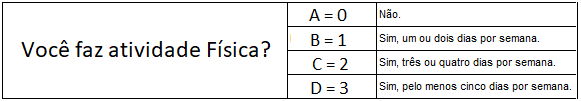

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1

o onehortencoder aumenta a matriz pois  transformam as colunas em opções desta forma acima 


In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Parâmetros ColumnTransformer
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas: 
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default.  
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

In [68]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)

#Escalonamento

In [66]:
from sklearn.preprocessing import StandardScaler

In [69]:
previsores3_esc = StandardScaler().fit_transform(previsores3)

In [ ]:
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df

In [ ]:
previsores3df.describe()

## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.

## **Redução de dimensionalidade**

Objetivo é selecionar os melhores componentes (atributos) para treinamento do algoritmo, através da análise das correlações entre as variáveis.

### Análise dos Componentes Principais (PCA)

**Seleção de características:** seleciona os melhores atributos e utiliza sem transformações.

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [72]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(n_components=3)

In [84]:
previsores_pca = pca.fit_transform(previsores2)

In [ ]:
# Componentes principais
previsores_pca

In [86]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.72847929, 0.17183534, 0.08122019])

In [87]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.9815348236774062

### Kernel PCA

É um algoritmo de aprendizagem não supervisionada.

Aplica-se também em dados linearmente não separáveis.

In [88]:
from sklearn.decomposition import KernelPCA

In [89]:
kpca = KernelPCA(n_components=4, kernel='rbf')

In [91]:
previsores_kernel = kpca.fit_transform(previsores2)

In [ ]:
previsores_kernel

### **Análise do Discriminante Linear (LDA: Linear Discriminant Analysis)**

Algoritmo de aprendizagem supervisionada, pois utiliza a classe como referência para seleção.

Aplicado em situações com muitos atributos previsores e também com o atributo alvo com muitas classes.

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)

In [94]:
previsores_lda = lda.fit_transform(previsores2, alvo)

In [ ]:
previsores_lda

In [ ]:
lda.explained_variance_ratio_

## **Salvando as variáveis (atributos)**

In [98]:
import pickle

In [99]:
# Criando arquivo
arq1 = open('heart.pkl', 'wb')

In [100]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [101]:
# Fechando arquivo
arq1.close()

In [102]:
# Lendo arquivo
arq1 = open('heart.pkl', 'rb')

In [103]:
# Chamando a variável
alvo = pickle.load(arq1)

In [ ]:
alvo

In [105]:
# Criando arquivos e Salvando as variáveis
arq2 = open('heart2.pkl', 'wb')
pickle.dump(previsores, arq2)
arq3 = open('heart3.pkl', 'wb')
pickle.dump(previsores_esc, arq3)
arq4 = open('heart4.pkl', 'wb')
pickle.dump(previsores2, arq4)
arq5 = open('heart5.pkl', 'wb')
pickle.dump(previsores3, arq5)
arq6 = open('heart6.pkl', 'wb')
pickle.dump(previsores3_esc, arq6)

In [106]:
arq2 = open('heart2.pkl', 'rb')

In [107]:
previsores = pickle.load(arq2)

In [ ]:
previsores

## **BASE DE TREINO E TESTE**

In [109]:
from sklearn.model_selection import train_test_split

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [124]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores3, alvo, test_size = 0.3, random_state = 0)

# **NAIVE BAYES**

https://scikit-learn.org/stable/modules/naive_bayes.html



Treinamento do algoritmo

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

GaussianNB()

*Avaliação* do algoritmo

In [ ]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

In [ ]:
y_teste


In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [128]:
accuracy_score(y_teste, previsoes_naive)

0.8478260869565217

In [129]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 84.78%


In [135]:
confusion_matrix(y_teste, previsoes_naive)

array([[100,  21],
       [ 21, 134]])

In [130]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       121
           1       0.86      0.86      0.86       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



**Análise dados de treino**

In [ ]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

In [132]:
accuracy_score(y_treino, previsoes_treino)

0.8611544461778471

In [133]:
confusion_matrix(y_treino, previsoes_treino)

array([[248,  41],
       [ 48, 304]])

### **Validação Cruzada**

In [123]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) - previsores3_esc



